In [1]:
#!pip install imbalanced-learn

In [2]:
import numpy as np 
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("../DATA/card_transdata.csv")
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
data[data["fraud"]==0].count()

distance_from_home                912597
distance_from_last_transaction    912597
ratio_to_median_purchase_price    912597
repeat_retailer                   912597
used_chip                         912597
used_pin_number                   912597
online_order                      912597
fraud                             912597
dtype: int64

In [5]:
data[data["fraud"]==1].count()

distance_from_home                87403
distance_from_last_transaction    87403
ratio_to_median_purchase_price    87403
repeat_retailer                   87403
used_chip                         87403
used_pin_number                   87403
online_order                      87403
fraud                             87403
dtype: int64

In [6]:
data["fraud"].value_counts()/data.shape[0]*100

0.0    91.2597
1.0     8.7403
Name: fraud, dtype: float64

<AxesSubplot: xlabel='fraud', ylabel='count'>

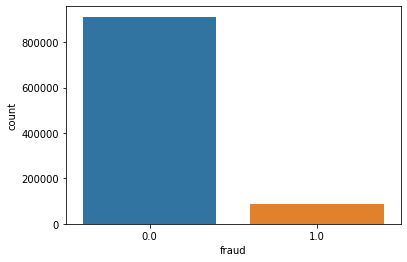

In [7]:
sns.countplot(x="fraud" ,data=data)

In [8]:
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE  
from imblearn.over_sampling import RandomOverSampler as ROS  
from imblearn.under_sampling import RandomUnderSampler as RUS 

In [9]:
X=data.drop(columns=["fraud"])
y= data.fraud 

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.4)

In [11]:
X_train[y_train==1].shape[0]/X_train.shape[0]*100


8.708333333333334

In [12]:
X_train[y_train==1].shape[0]/X_train[y_train==0].shape[0]*100

9.539023277042446

In [13]:
X_train[y_train==1].shape[0]/X_train[y_train==0].shape[0]*100 /9.6

0.9936482580252548

In [14]:
ros = ROS(sampling_strategy=35/65) ##moehme haaaaa 
rus = RUS (sampling_strategy=35/65)
smote = SMOTE(sampling_strategy=35/65)

In [15]:
X_train_ros , y_train_ros = ros.fit_resample(X_train,y_train)
X_train_rus , y_train_rus = rus.fit_resample(X_train,y_train)
X_train_smote , y_train_smote = smote.fit_resample(X_train,y_train)

In [16]:
print ("in ros model ( X[1]/X[total])  :  " ,format(X_train_ros[y_train_ros == 1].shape[0]/ X_train_ros.shape[0] * 100) )  
print ("in rus model ( X[1]/X[total])  :  " ,format(X_train_rus[y_train_rus == 1].shape[0]/ X_train_rus.shape[0] * 100) )  
print ("in smote model ( X[1]/X[total])  :  " ,format(X_train_smote[y_train_smote == 1].shape[0]/ X_train_smote.shape[0] * 100) )  

in ros model ( X[1]/X[total])  :   34.999976266536294
in rus model ( X[1]/X[total])  :   35.000167464916096
in smote model ( X[1]/X[total])  :   34.999976266536294


In [17]:
print ("in ros model ( X[1]/X[0])  :  " ,format(X_train_ros[y_train_ros == 1].shape[0]/ X_train_ros[y_train_ros==0].shape[0] * 100 ) )  
print ("in rus model ( X[1]/X[0])  :  " ,format(X_train_rus[y_train_rus == 1].shape[0]/ X_train_rus[y_train_rus==0].shape[0] * 100 ) )  
print ("in smote model ( X[1]/X[0])  :  " ,format(X_train_smote[y_train_smote == 1].shape[0]/ X_train_smote[y_train_smote==0].shape[0] * 100 ) )  

in ros model ( X[1]/X[0])  :   53.846097672295755
in rus model ( X[1]/X[0])  :   53.84655021384037
in smote model ( X[1]/X[0])  :   53.846097672295755


In [18]:
print ("X_train_ros.shape :  ", format(X_train_ros.shape[0]))
print ("X_train_rus.shape :  ", format(X_train_rus.shape[0]))
print ("X_train_smote.shape :  ", format(X_train_smote.shape[0]))
# in ros we have more data 

X_train_ros.shape :   842692
X_train_rus.shape :   149285
X_train_smote.shape :   842692


In [19]:
print( np.unique(X_train_ros["repeat_retailer"]) ) 
print ( np.unique(X_train_rus["repeat_retailer"]) ) 
print ( np.unique(X_train_smote["repeat_retailer"])) 
## defrence betwean "ros" && "smote" is in data 
## yeki az rah haye estefade as smote ine ke data ro round konim 

[0. 1.]
[0. 1.]
[0.00000000e+00 7.51305123e-04 1.26669383e-03 ... 9.99389361e-01
 9.99500999e-01 1.00000000e+00]


In [20]:
np.unique(np.round(X_train_smote["online_order"])) ## dorost mishe 


array([0., 1.])

In [21]:
X_train_smote

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.537818,1.953887,0.080669,1.0,0.0,0.0,1.0
1,72.560825,1.365107,1.976618,1.0,1.0,0.0,0.0
2,65.463109,1.334018,6.435051,1.0,0.0,0.0,0.0
3,0.768289,0.355852,0.251090,0.0,0.0,0.0,1.0
4,76.878279,0.442263,3.662887,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
842687,54.468344,0.186105,4.444912,1.0,1.0,0.0,1.0
842688,21.886542,2.226786,6.019302,1.0,0.0,0.0,1.0
842689,4.695170,0.487706,19.559422,1.0,0.0,0.0,1.0
842690,12.063546,0.404609,6.164339,1.0,0.0,0.0,1.0


In [22]:
X_train_smote["repeat_retailer"] = np.round(X_train_smote["repeat_retailer"])  
X_train_smote["used_chip"] = np.round(X_train_smote["used_chip"]) 
X_train_smote["used_pin_number"] = np.round(X_train_smote["used_pin_number"]) 
X_train_smote["online_order"] = np.round(X_train_smote["online_order"])

In [23]:
np.unique(np.round(X_train_smote["repeat_retailer"]))  
np.unique(np.round(X_train_smote["used_chip"]))  
np.unique(np.round(X_train_smote["used_pin_number"]))  
np.unique(np.round(X_train_smote["online_order"])) 


array([0., 1.])

In [24]:
from sklearn.ensemble import RandomForestClassifier as RFC 
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report , recall_score , f1_score ,precision_score 

In [25]:
rfc_ros  = RFC(n_estimators=10).fit(X_train_ros,y_train_ros)
rfc_rus  = RFC(n_estimators=10).fit(X_train_rus,y_train_rus)
rfc_smote  = RFC(n_estimators=10).fit(X_train_smote ,y_train_smote )

In [26]:
print ( classification_report(y_true=y_test, y_pred=rfc_ros.predict(X_test))) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    364847
         1.0       1.00      1.00      1.00     35153

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



In [27]:
print ( classification_report(y_true=y_test, y_pred=rfc_rus.predict(X_test))) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    364847
         1.0       1.00      1.00      1.00     35153

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



In [28]:
print ( classification_report(y_true=y_test, y_pred=rfc_smote.predict(X_test))) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    364847
         1.0       1.00      1.00      1.00     35153

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



In [29]:
from sklearn.naive_bayes import GaussianNB 

In [30]:
gb_ros  = GaussianNB().fit(X_train_ros,y_train_ros)
gb_rus  = GaussianNB().fit(X_train_rus,y_train_rus)
gb_smote  = GaussianNB().fit(X_train_smote ,y_train_smote )

In [31]:
print ( classification_report(y_true=y_test, y_pred=gb_ros.predict(X_test))) 

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    364847
         1.0       0.62      0.96      0.75     35153

    accuracy                           0.94    400000
   macro avg       0.81      0.95      0.86    400000
weighted avg       0.96      0.94      0.95    400000



In [32]:
print ( classification_report(y_true=y_test, y_pred=gb_rus.predict(X_test))) 

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98    364847
         1.0       0.69      0.93      0.79     35153

    accuracy                           0.96    400000
   macro avg       0.84      0.94      0.88    400000
weighted avg       0.97      0.96      0.96    400000



In [33]:
print ( classification_report(y_true=y_test, y_pred=gb_smote.predict(X_test))) 

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    364847
         1.0       0.57      0.96      0.72     35153

    accuracy                           0.93    400000
   macro avg       0.79      0.95      0.84    400000
weighted avg       0.96      0.93      0.94    400000

